# Capstone: Recommending Art
By: Corina Lentz

## Problem Statement

The goal of this project is to build a recommender engine that can take in an artist’s name and recommend similar artists based on the art tags the artists share.

I'm confident that this recommender would be valuable for museums to drive engagement on their social media and websites, which could then be used to increase museum memberships, special exhibit ticket sales, and online sales for related merchandise.

## The Data

The dataset I am using for this project is the Metropolitan Museum of Art Open Access Initiative dataset. It is maintained and updated by the Metropolitan Museum of Art. The dataset currently contains 475,897 rows and 54 columns. Each row is one piece of art. The columns provide information about the artwork such as country it was created in, materials used, name of the item that the artwork is, classification of the artwork, department where the artwork is housed, and so on. The columns also have information about the artist such as name, date of birth/death, nationality, role in the project, and so on. Due to size restrictions, the dataset (and saved dataframes) will not be uploaded to this repo but it can be found on GitHub [here [1]](https://github.com/metmuseum/openaccess).  

## Background

The Metropolitan Museum of Art was established in 1870 in New York City, NY. Today the museum spans two sites in New York City: The Met Fifth Avenue and The Met Cloisters [[2]](https://www.metmuseum.org/about-the-met). In addition to housing a large collection of artwork, the Metropolitan Museum also has robust conservation and scientific research departments dedicated to developing new techniques in conservation and art analytics [[3]](https://www.metmuseum.org/about-the-met/conservation-and-scientific-research/projects).

## Data Cleaning & Pre-Processing

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
#Referenced this page for code to adjust the max columns: 
#https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
#And referenced this page for code to adjust max column width:
#https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#Reading-in the dataset
df = pd.read_csv('./data/MetObjects.csv', low_memory = False)

In [3]:
#Taking a look at the first 5 rows.
df.head()

Object Number  Is Highlight  Is Timeline Work  Is Public Domain  Object ID  \
0    1979.486.1         False             False             False          1   
1    1980.264.5         False             False             False          2   
2      67.265.9         False             False             False          3   
3     67.265.10         False             False             False          4   
4     67.265.11         False             False             False          5   

  Gallery Number         Department AccessionYear Object Name  \
0            NaN  The American Wing          1979        Coin   
1            NaN  The American Wing          1980        Coin   
2            NaN  The American Wing          1967        Coin   
3            NaN  The American Wing          1967        Coin   
4            NaN  The American Wing          1967        Coin   

                          Title Culture Period Dynasty Reign Portfolio  \
0  One-dollar Liberty Head Coin     NaN    NaN     NaN   NaN       NaN   
1  Ten-dollar Liberty Head Coin     NaN    NaN     NaN   NaN       NaN   
2    Two-and-a-Half Dollar Coin     NaN    NaN     NaN   NaN       NaN   
3    Two-and-a-Half Dollar Coin     NaN    NaN     NaN   NaN       NaN   
4    Two-and-a-Half Dollar Coin     NaN    NaN     NaN   NaN       NaN   

  Constituent ID Artist Role Artist Prefix    Artist Display Name  \
0          16429       Maker                James Barton Longacre   
1            107       Maker                   Christian Gobrecht   
2            NaN         NaN           NaN                    NaN   
3            NaN         NaN           NaN                    NaN   
4            NaN         NaN           NaN                    NaN   

                                                             Artist Display Bio  \
0  American, Delaware County, Pennsylvania 1794–1869 Philadelphia, Pennsylvania   
1                                                                     1785–1844   
2                                                                           NaN   
3                                                                           NaN   
4                                                                           NaN   

  Artist Suffix       Artist Alpha Sort Artist Nationality Artist Begin Date  \
0                Longacre, James Barton           American        1794         
1                   Gobrecht, Christian                           1785         
2           NaN                     NaN                NaN               NaN   
3           NaN                     NaN                NaN               NaN   
4           NaN                     NaN                NaN               NaN   

  Artist End Date Artist Gender                             Artist ULAN URL  \
0      1869                 NaN  http://vocab.getty.edu/page/ulan/500011409   
1      1844                 NaN  http://vocab.getty.edu/page/ulan/500077295   
2             NaN           NaN                                         NaN   
3             NaN           NaN                                         NaN   
4             NaN           NaN                                         NaN   

                      Artist Wikidata URL Object Date  Object Begin Date  \
0  https://www.wikidata.org/wiki/Q3806459        1853               1853   
1  https://www.wikidata.org/wiki/Q5109648        1901               1901   
2                                     NaN     1909–27               1909   
3                                     NaN     1909–27               1909   
4                                     NaN     1909–27               1909   

   Object End Date Medium                Dimensions  \
0             1853   Gold    Dimensions unavailable   
1             1901   Gold    Dimensions unavailable   
2             1927   Gold  Diam. 11/16 in. (1.7 cm)   
3             1927   Gold  Diam. 11/16 in. (1.7 cm)   
4             1927   Gold  Diam. 11/16 in. (1.7 cm)   

                          C

In [4]:
#Reviewing the size of the dataset
df.shape

(475897, 54)

In [5]:
#Seeing how many null values each column has
df.isnull().sum()

Object Number                   0
Is Highlight                    0
Is Timeline Work                0
Is Public Domain                0
Object ID                       0
Gallery Number             431969
Department                      0
AccessionYear                4306
Object Name                  1515
Title                       29306
Culture                    268875
Period                     385162
Dynasty                    452657
Reign                      464672
Portfolio                  452557
Constituent ID             202187
Artist Role                204286
Artist Prefix              202187
Artist Display Name        202187
Artist Display Bio         204286
Artist Suffix              202235
Artist Alpha Sort          202187
Artist Nationality         202187
Artist Begin Date          202187
Artist End Date            202187
Artist Gender              373955
Artist ULAN URL            257119
Artist Wikidata URL        260360
Object Date                 14333
Object Begin D

In [6]:
#Dropping all rows that have a null value in the Tags and Artist Display Name columns and saving to a new df
tags=df.dropna(subset=['Tags', 'Artist Display Name'])

#Converting the remaining null values to "Not provided" to have a consistent data type
tags.fillna(value='Not provided', inplace=True)

C:\Users\rinet\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [7]:
#Saving the cleaned and processed data
tags.to_csv('./data/cleaned-and-processed-data.csv')

In [8]:
#Taking a look at the size of the data now
tags.shape

(136861, 54)

Even after dropping all those rows there is still a large amount of data to work with.

In [9]:
#Taking a look at the value counts in the Department column.
tags['Department'].value_counts()

Drawings and Prints                          74781
Photographs                                  19354
European Sculpture and Decorative Arts        9442
Asian Art                                     7833
Modern and Contemporary Art                   7703
The American Wing                             6639
Costume Institute                             4561
European Paintings                            2605
Robert Lehman Collection                      1326
Greek and Roman Art                            786
Islamic Art                                    623
Arts of Africa, Oceania, and the Americas      380
Arms and Armor                                 325
Egyptian Art                                   204
Medieval Art                                   133
The Cloisters                                  111
Musical Instruments                             51
Ancient Near Eastern Art                         4
Name: Department, dtype: int64

Now that I've completed some cleaning and pre-processing I'll start compiling the dataframe that I'll use for the model. I'm sorting based on the departments and using the ones that need the least additional filtering and cleaning.

In [10]:
#Creating a new dataframe starting with the European Paintings department
df_1 = tags[tags['Department'] == 'European Paintings']

In [11]:
df_1.shape

(2605, 54)

In [12]:
#Building a function to append additional rows to this new dataframe filtered by the department
def deprtmt(dept_list):
    #Creating empty dataframe we can append to within the function
    appnd = pd.DataFrame()
    #Establishing a counter
    counter = 0
    
    while counter != len(dept_list): #Keep iterating through the list until the counter is equal to the length of the input
        for value in dept_list: 
            filtr = tags[tags['Department'] == value] #Filtering our tags dataframe using the value
            appnd=appnd.append(filtr) #Append the new dataframe with the resulting rows and columns
            counter += 1 #For each iteration add 1 to our counter
    return appnd

In [13]:
#Creating the department filter list and saving the generated dataframe to a variable
dprtmt_list= ['Drawings and Prints', 'Greek and Roman Art', 'Robert Lehman Collection', 'Islamic Art', 'Arts of Africa, Oceania, and the Americas',
             'Medieval Art', 'Ancient Near Eastern Art']
appnd= deprtmt(dprtmt_list)

In [14]:
#Now I will append the dataframe the function created to the df_1 dataframe
df_1=df_1.append(appnd)

In [15]:
#Confirming that the new dataframe contains the expected departments
df_1['Department'].unique()

array(['European Paintings', 'Drawings and Prints', 'Greek and Roman Art',
       'Robert Lehman Collection', 'Islamic Art',
       'Arts of Africa, Oceania, and the Americas', 'Medieval Art',
       'Ancient Near Eastern Art'], dtype=object)

In [16]:
#Dropping any rows with any of the classification in filtr using code found here: 
#https://stackoverflow.com/questions/17097643/search-for-does-not-contain-on-a-dataframe-in-pandas

filtr=['tablets and plaques', 'Manuscripts and Illuminations', 'Wallpaper|Ornament & Architecture|Prints', 'Books', 'Books|Periodicals', 
       'Periodicals', 'Costumes-Tapestries', 'Documents', 'Manuscripts', 'Letters', 'Celluloid', 'Plates', 'Photographs', 'Reproductions-Models',
       'Bindings', 'games or toys', 'Glass', 'Enamels', 'Textiles-Tapestries', 'Daggers', 'Woodwork-Furniture', 'Medals', 'Plaquettes', 
       'Metalwork', 'Snuffboxes', 'Jewelry', 'Precious Metals and Precious Stones', 'Textiles-Woven', 'Metalwork-Silver', 'Main dress-Womenswear', 
       'Main dress-Menswear', 'Codices', 'Reproductions', 'Metal', 'Ceramics', 'Wood', 'Ceramics-Tiles', 'Stone', 'Lacquer', 'Coins', 'Textiles',
      'Beads-Costumes', 'Textiles-Beadwork', 'Hide-Costumes', 'Beads-Containers|Hide-Costumes', 'Negatives']

splttr= '|'.join(filtr)
df_1=df_1[~df_1['Classification'].str.contains(splttr)]

In [19]:
#Using this code to merge rows of the same artist:
#https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

#Creating the dataframe that we will be used in the model using the merged Artist display column
model_df=df_1.groupby(['Artist Display Name'])['Tags'].apply(lambda x: '|'.join(x)).reset_index()

In [20]:
#Taking a look at the first row of the new dataframe
model_df.head(1)

Artist Display Name                            Tags
0  (Johann Heinrich) Ferdinand Olivier  Buildings|Human Figures|Christ

In [22]:
#Creating dummy columns for each of the individual tags and joining them to our dataframe, then dropping the Tags column
model_df=model_df.drop(columns=['Tags']).join(model_df['Tags'].str.get_dummies(sep='|'))

#Setting the Artist Display Name column as the index
model_df = model_df.set_index(['Artist Display Name'])

---

## EDA

In [23]:
#Taking a look at the size of the model dataframe
model_df.shape

(4774, 878)

During data cleaning and pre-processing I dropped all rows that contained null values in the **Tags** and **Artist Display Name** columns, filtered out rows that contained 10 of the 18 departments in the **Department** column, merged together rows that had the same **Artist Display Name** values, and created dummy columns based on the unique **Tag** column values. This left me with a dataframe containing 4,774 unique artists/artist group rows and 878 unique tag columns.

In [24]:
#Summing-up the tag columns and saving the result to a variable
tags_sum=model_df.sum(axis=0, numeric_only=True)

Taking a look at the top ten most common and most uncommon tags

In [25]:
#Initial review found there is a large gap between the top 2 most common tags and the remaining 8 most common tags,
#so calculating and plotting the top 2 separate from the others
most_common=tags_sum.sort_values(ascending=False)[0:2]
most_common

Men      2244
Women    1733
dtype: int64

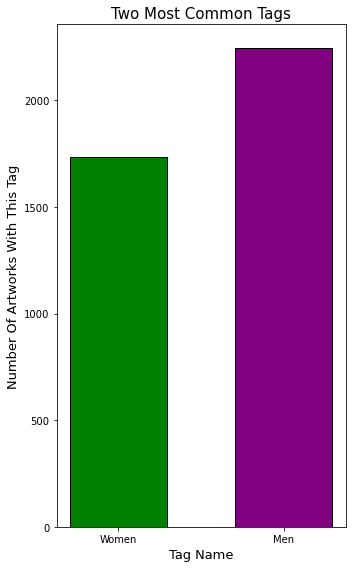

In [26]:
#Plotting the top two most common tags
plt.figure(figsize=(5, 8))

plt.bar(x=most_common, height=most_common, width=300, tick_label=['Men', 'Women'], color=['purple', 'g'], 
        edgecolor= 'black');
plt.xlabel('Tag Name', fontsize=13);
plt.ylabel('Number Of Artworks With This Tag', fontsize=13);
plt.title('Two Most Common Tags', fontsize=15)
plt.tight_layout();

In [27]:
other_common=tags_sum.sort_values(ascending=False)[2:11]
other_common

Portraits        706
Landscapes       600
Trees            560
Human Figures    390
Angels           381
Christ           347
Dogs             345
Saints           315
Buildings        312
dtype: int64

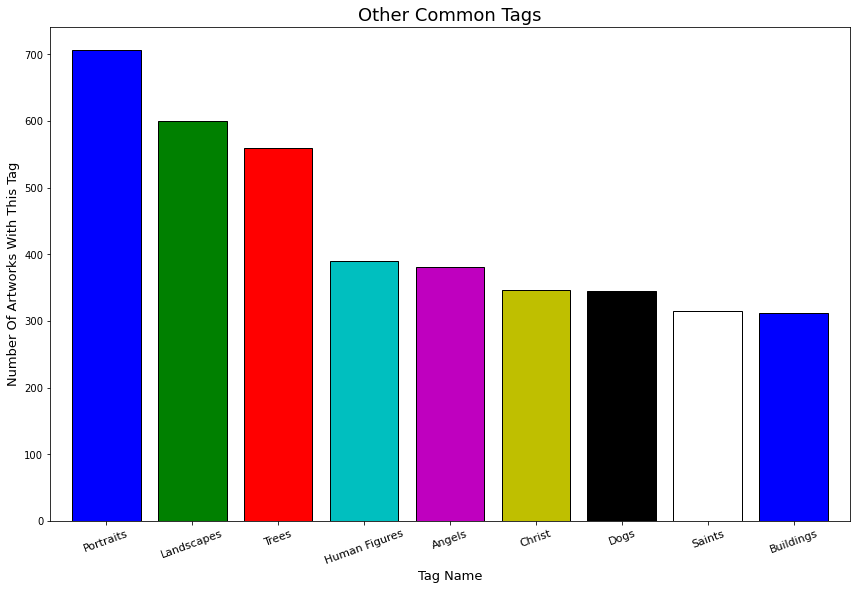

In [30]:
plt.figure(figsize=(12, 8.3))

other_common.plot(kind='bar', color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'], edgecolor='k', width=0.8);
plt.xticks(rotation=20, size=11)
plt.xlabel('Tag Name', fontsize=13);
plt.ylabel('Number Of Artworks With This Tag', fontsize=13);
plt.title('Other Common Tags', fontsize=18)
plt.tight_layout();

In [32]:
#Looking at the 10 least common tags
least_common=tags_sum.sort_values(ascending=True)[0:11]
least_common

Aaron       1
Homer       1
Botany      1
Piers       1
Bobbins     1
Pigeons     1
Pins        1
Clothing    1
Plows       1
Pluto       1
Cybele      1
dtype: int64

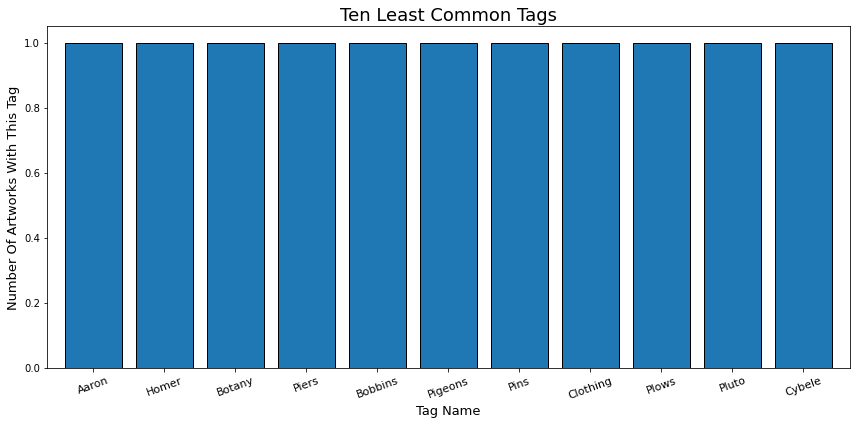

In [35]:
#Plotting the 10 least common tags
plt.figure(figsize=(12, 6))

least_common.plot(kind='bar', edgecolor='k', width=0.8);
plt.xticks(rotation=20, size=11)
plt.xlabel('Tag Name', fontsize=13);
plt.ylabel('Number Of Artworks With This Tag', fontsize=13);
plt.title('Ten Least Common Tags', fontsize=18)
plt.tight_layout();

## Modeling


In [38]:
#Converting the model dataframe to a sparse matrix that will make computing more manageable
pivot_sparse = sparse.csr_matrix(model_df.fillna(0))

#Calculating the cosine distance
recommender = pairwise_distances(pivot_sparse, metric='cosine')

#Creating a recommendor dataframe with the cosine distance calculations, setting the index/column names to be the Artist Display Names
#and taking a look a the dataframe
recommender_df = pd.DataFrame(recommender, columns=model_df.index, index=model_df.index)

recommender_df

Artist Display Name                                                  (Johann Heinrich) Ferdinand Olivier  \
Artist Display Name                                                                                        
(Johann Heinrich) Ferdinand Olivier                                                                  0.0   
(Johann Heinrich) Ferdinand Olivier|Anonymous, German, 19th century                                  1.0   
(Johann Heinrich) Ferdinand Olivier|Heinrich Olivier                                                 1.0   
A. Brent                                                                                             1.0   
A. Foa                                                                                               1.0   
...                                                                                                  ...   
baron Antoine Jean Gros                                                                              1.0   
baron Dominique Vivant Denon                                                                         1.0   
baron François Gérard                                                                                1.0   
de la Maire|Destouches|Anonymous, French, 18th century                                               1.0   
del Tasso                                                                                            1.0   

Artist Display Name                                                  (Johann Heinrich) Ferdinand Olivier|Anonymous, German, 19th century  \
Artist Display Name                                                                                                                        
(Johann Heinrich) Ferdinand Olivier                                                                                                  1.0   
(Johann Heinrich) Ferdinand Olivier|Anonymous, German, 19th century                                                                  0.0   
(Johann Heinrich) Ferdinand Olivier|Heinrich Olivier                                                                                 1.0   
A. Brent                                                                                                                             1.0   
A. Foa                                                                                                                               1.0   
...                                                                                                                                  ...   
baron Antoine Jean Gros                                                                                                              1.0   
baron Dominique Vivant Denon                                                                                                         1.0   
baron François Gérard                                                                                                                1.0   
de la Maire|Destouches|Anonymous, French, 18th century                                                                               1.0   
del Tasso                                                                                                                            1.0   

Artist Display Name                                                  (Johann Heinrich) Ferdinand Olivier|Heinrich Olivier  \
Artist Display Name                                                                                                         
(Johann Heinrich) Ferdinand Olivier                                                                              1.000000   
(Johann Heinrich) Ferdinand Olivier|Anonymous, German, 19th century                                              1.000000   
(Johann Heinrich) Ferdinand Olivier|Heinrich Olivier                                                             0.000000   
A. Brent                                                                                                         0.500000   
A. Foa                  

## Results

Now that recommender engine has been built I'll compare artwork from the inputted artist to artwork from some of the top-ten most recommended artists. In respect to copyright I will only be looking at artwork that is public domain. All included images are from the Metropolitan Museum of Art website and were provided on the website for use under public domain. With the cosine similarity values that are listed to the left of the artist name, the closer the number is to zero the more similar the recommender says the artists are. 

In [37]:
recommender_df['Vincent van Gogh'].sort_values()[1:11]

Artist Display Name
John Linnell                             0.571429
Benjamin West                            0.577423
Pierre Louis Dubourcq                    0.601138
Constantin Alexandrovitch Westchiloff    0.601138
Ferdinand Georg Waldmüller               0.614242
Egbert van Drielst                       0.614242
Joseph Nash                              0.614242
Georges d'Espagnat                       0.618119
Continental Painter                      0.622036
Thomas Gainsborough|George Frost         0.622036
Name: Vincent van Gogh, dtype: float64

![Wheat Field with Cypresses By: Vincent van Gogh](\assets\vincent-van-gogh.png) 

<u>Wheat Field with Cypresses<u>
    By: Vincent van Gogh [[3]](https://www.metmuseum.org/art/collection/search/436535?searchField=All&amp;sortBy=Relevance&amp;high=on&amp;ao=on&amp;showOnly=openAccess&amp;ft=Vincent+van+Gogh&amp;offset=0&amp;rpp=20&amp;pos=2)

![View of Kensington Gardens, London By: John Linnell](\assets\john-linnell.png)

<u>View of Kensington Gardens, London<u>
    By: John Linnell [[4]](https://www.metmuseum.org/art/collection/search/340713?searchField=All&amp;sortBy=Relevance&amp;ao=on&amp;showOnly=openAccess&amp;ft=John+Linnell&amp;offset=0&amp;rpp=20&amp;pos=2 )

![Moses Shown the Promised Land By: Benjamin West](\assets\benjamin-west.png)

<u>Moses Shown the Promised Land<u>
    By: Benjamin West [[11]](https://www.metmuseum.org/art/collection/search/13200?searchField=All&amp;sortBy=Relevance&amp;ao=on&amp;showOnly=openAccess&amp;ft=Benjamin+West&amp;offset=0&amp;rpp=20&amp;pos=3)

The cosine similarity for both of the artists compared to our input artist Vincent Van Gogh is unfortunately quite high(0.5714 and 0.5774 for the top two). It isn't surprising that the artwork from the top two artists, John Linnell and Benjamin West, are not that similar to Van Gogh's work. 

In [40]:
recommender_df['Adélaïde Labille-Guiard'].sort_values()[1:11]

Artist Display Name
Piero del Pollaiuolo (Piero di Jacopo Benci)    0.345346
Marie Denise Villers                            0.345346
Martha Washington|Eleanor Parke Custis          0.345346
Joseph Jean Bernard                             0.345346
Vincent                                         0.345346
Master of the Castello Nativity                 0.345346
Master H.A. or A.H.                             0.345346
Frans Pourbus the Younger                       0.345346
Giovanni di Francesco del Cervelliera           0.345346
Vincenzo Gemito                                 0.345346
Name: Adélaïde Labille-Guiard, dtype: float64

![Self-Portrait with Two Pupils, Marie Gabrielle Capet (1761–1818) and Marie Marguerite Carreaux de Rosemond (died 1788) 
By: Adélaïde Labille-Guiard](\assets\adelaide-labille-guiard.png) 

<u>Self-Portrait with Two Pupils, Marie Gabrielle Capet (1761–1818) and Marie Marguerite Carreaux de Rosemond (died 1788)<u>
    By: Adélaïde Labille-Guiard [[8]](https://www.metmuseum.org/art/collection/search/436840?searchField=All&amp;sortBy=Relevance&amp;ao=on&amp;showOnly=openAccess&amp;ft=Ad%c3%a9la%c3%afde+Labille-Guiard&amp;offset=0&amp;rpp=20&amp;pos=1)

![Portrait of a Woman By: Piero del Pollaiuolo (Piero di Jacopo Benci)](\assets\piero-del-pollaiuolo.png) 

<u>Portrait of a Woman<u>
    By: Piero del Pollaiuolo (Piero di Jacopo Benci) [[9]](https://www.metmuseum.org/art/collection/search/437322?searchField=All&amp;sortBy=Relevance&amp;ao=on&amp;showOnly=openAccess&amp;ft=Piero+del+Pollaiuolo+(Piero+di+Jacopo+Benci)&amp;offset=0&amp;rpp=20&amp;pos=1)

![Marie Joséphine Charlotte du Val d'Ognes (1786–1868) By: Marie Denise Villers](\assets\marie-denise-villers.png) 

<u>Marie Joséphine Charlotte du Val d'Ognes (1786–1868)<u>
    By: Marie Denise Villers [[10]](https://www.metmuseum.org/art/collection/search/437903?searchField=All&amp;sortBy=Relevance&amp;ao=on&amp;showOnly=openAccess&amp;ft=Marie+Denise+Villers&amp;offset=0&amp;rpp=20&amp;pos=1)

The top-ten most similar artists for Adélaïde Labille-Guiard surprisingly share the same cosine similarity of 0.3453 indicating the artworks are fairly similar. In comparing the top two most similar artists, Piero del Pollaiuolo and Marie Denise Villers, both do share a lot of similarities with Labille-Guiard's work. However Marie Denise Villers' work has a closer resembelence to Labille-Guiard's work. 

In [38]:
recommender_df['James McNeill Whistler'].sort_values()[1:11]

Artist Display Name
Alessandro Maganza                                       0.0
Jean François Léonor Mérimée                             0.0
Adolphe-Léon Willette|Ambroise Vollard                   0.0
Carracci School|Giacomo Cavedone                         0.0
Anicet Charles Gabriel Lemonnier                         0.0
Henri-Félix-Emmanuel Philippoteaux                       0.0
Erhard Altdorfer                                         0.0
Henry William Bunbury                                    0.0
Perino del Vaga (Pietro Buonaccorsi)|Prospero Fontana    0.0
Painter of the New York Hypnos                           0.0
Name: James McNeill Whistler, dtype: float64

![Arrangement in Flesh Colour and Black: Portrait of Theodore Duret By: James McNeill Whistler](\assets\james-mcneill-whistler.png) 

<u>Arrangement in Flesh Colour and Black: Portrait of Theodore Duret<u>
    By: James McNeill Whistler [[5]](https://www.metmuseum.org/art/collection/search/392561?searchField=All&amp;sortBy=Relevance&amp;showOnly=openAccess&amp;ft=James+McNeill+Whistler&amp;offset=0&amp;rpp=20&amp;pos=11)

![A Justice of the Peace By: Jean François Léonor Mérimée](\assets\jean-francois-leonor-merimee.png) 

<u>A Justice of the Peace<u>
    By: Jean François Léonor Mérimée [[6]](https://www.metmuseum.org/art/collection/search/371357?searchField=All&amp;sortBy=Relevance&amp;showOnly=openAccess&amp;ft=Jean+Fran%c3%a7ois+L%c3%a9onor+M%c3%a9rim%c3%a9e&amp;offset=0&amp;rpp=20&amp;pos=1 )

![Figure of a Man, the Lawyer By: Henry William Bunbury](\assets\henry-william-bunbury.png) 

<u>Figure of a Man, the Lawyer<u>
    By: Henry William Bunbury [[7]](https://www.metmuseum.org/art/collection/search/340946?searchField=All&amp;sortBy=Relevance&amp;showOnly=openAccess&amp;ft=Henry+William+Bunbury&amp;offset=0&amp;rpp=20&amp;pos=4)

Of the three input artists, James McNeill Whistler has the best cosine similarity with 0.0 for all of their top ten most similar artists. Some of the artists (including the one listed first for recommended artists) do not have public domain art. Fortunately all of the artists have the exact same cosine similarity so, in theory, it is ok to compare any of the top three artsists with Whistler's work. I chose Jean François Léonor Mérimée and Henry William Bunbury. I was pleasantly surprised by how similar the artworks of all three artists were. In the example pieces we see all three feature a taller man with a hat, boots, and a jacket. Arguably Mérimée is the most similar to Whistler, but Bunburry is also fairly similar.

## Conclusions & Next Steps

I am happy to say that I did successfully build a recommender engine that can take in an artist's name and recommend similar artists based on art tags that the artists share.

For next steps I would recommend adding art movements to the tags and include additional artworks from some of the departments that were filtered out during our initial cleaning and pre-processing. Lastly, I would like to see this recommender hosted on a website so that others can use it.


## Resources

1. https://github.com/metmuseum/openaccess
2. https://www.metmuseum.org/about-the-met 
3. https://www.metmuseum.org/art/collection/search/436535?searchField=All&amp;sortBy=Relevance&amp;high=on&amp;ao=on&amp;showOnly=openAccess&amp;ft=Vincent+van+Gogh&amp;offset=0&amp;rpp=20&amp;pos=2 
4. https://www.metmuseum.org/art/collection/search/340713?searchField=All&amp;sortBy=Relevance&amp;ao=on&amp;showOnly=openAccess&amp;ft=John+Linnell&amp;offset=0&amp;rpp=20&amp;pos=2 
5. https://www.metmuseum.org/art/collection/search/392561?searchField=All&amp;sortBy=Relevance&amp;showOnly=openAccess&amp;ft=James+McNeill+Whistler&amp;offset=0&amp;rpp=20&amp;pos=11
6. https://www.metmuseum.org/art/collection/search/371357?searchField=All&amp;sortBy=Relevance&amp;showOnly=openAccess&amp;ft=Jean+Fran%c3%a7ois+L%c3%a9onor+M%c3%a9rim%c3%a9e&amp;offset=0&amp;rpp=20&amp;pos=1 
7. https://www.metmuseum.org/art/collection/search/340946?searchField=All&amp;sortBy=Relevance&amp;showOnly=openAccess&amp;ft=Henry+William+Bunbury&amp;offset=0&amp;rpp=20&amp;pos=4
8.https://www.metmuseum.org/art/collection/search/436840?searchField=All&amp;sortBy=Relevance&amp;ao=on&amp;showOnly=openAccess&amp;ft=Ad%c3%a9la%c3%afde+Labille-Guiard&amp;offset=0&amp;rpp=20&amp;pos=1 
9. https://www.metmuseum.org/art/collection/search/437322?searchField=All&amp;sortBy=Relevance&amp;ao=on&amp;showOnly=openAccess&amp;ft=Piero+del+Pollaiuolo+(Piero+di+Jacopo+Benci)&amp;offset=0&amp;rpp=20&amp;pos=1 
10. https://www.metmuseum.org/art/collection/search/437903?searchField=All&amp;sortBy=Relevance&amp;ao=on&amp;showOnly=openAccess&amp;ft=Marie+Denise+Villers&amp;offset=0&amp;rpp=20&amp;pos=1
11. https://www.metmuseum.org/art/collection/search/13200?searchField=All&amp;sortBy=Relevance&amp;ao=on&amp;showOnly=openAccess&amp;ft=Benjamin+West&amp;offset=0&amp;rpp=20&amp;pos=3